This notebook is for reading in new test images for the categories in CIFAR10 and to check how well the model predicts the image types. The test images have been randomly downloaded from the web.  

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.utils import Bunch

import os
import skimage
from skimage.io import imread
from skimage.transform import resize
import re

In [2]:
from sklearn.metrics import classification_report

In [3]:
import tensorflow as tf

In [4]:
import skimage.io as io
from skimage import data_dir

In [6]:
def load_image_files(container_path, dimension=(32, 32)):
    """
    Load image files with categories as subfolder names 
    which performs like scikit-learn sample dataset
    
    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to
        
    Returns
    -------
    Bunch
    """
    image_dir = Path(container_path)
    
    folders = [directory for directory in sorted(image_dir.iterdir()) if directory.is_dir()]
    categories = [fo.name for fo in folders]
    descr = "A image classification test dataset for CIFAR-10"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            #print(file)
            extension = os.path.splitext(file)[1]
            if extension in {'.jpg','.jpeg'}:
                img = skimage.io.imread(file)
            elif extension == '.png':
                img = skimage.io.imread(file, plugin = 'matplotlib') ## need to add in plugin for reading png images.
            ##
            img = img[:,:,:3]
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized)
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [7]:
image_dataset = load_image_files("cifar10_test")

In [8]:
image_dataset

{'data': array([[[[0.04705882, 0.51764706, 0.81960784],
          [0.0745098 , 0.52156863, 0.82745098],
          [0.09411765, 0.5254902 , 0.83137255],
          ...,
          [0.03918696, 0.54901961, 0.84705882],
          [0.00392157, 0.5432598 , 0.84313725],
          [0.        , 0.54117647, 0.84313725]],
 
         [[0.14509804, 0.5310049 , 0.82745098],
          [0.16078431, 0.53333333, 0.83529412],
          [0.14745136, 0.53333333, 0.83529412],
          ...,
          [0.        , 0.5254902 , 0.83921569],
          [0.        , 0.52156863, 0.83921569],
          [0.        , 0.52156863, 0.83921569]],
 
         [[0.11629902, 0.52941176, 0.82745098],
          [0.11629902, 0.52941176, 0.83137255],
          [0.11764706, 0.52941176, 0.83529412],
          ...,
          [0.        , 0.51764706, 0.83921569],
          [0.        , 0.51764706, 0.83921569],
          [0.        , 0.52156863, 0.83921569]],
 
         ...,
 
         [[0.72156863, 0.79215686, 0.88235294],
          

In [9]:
image_dataset['target']

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9])

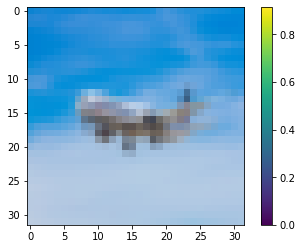

In [10]:
## View one test image 
plt.figure()
plt.imshow(image_dataset['images'][0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
label_names = ['airplane','automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
import random
## generate random integers for viewing the images 
y = random.sample(range(50), 25)
print(y)

[3, 9, 0, 33, 16, 34, 36, 41, 21, 14, 4, 49, 15, 43, 45, 40, 42, 11, 32, 26, 28, 48, 17, 20, 18]


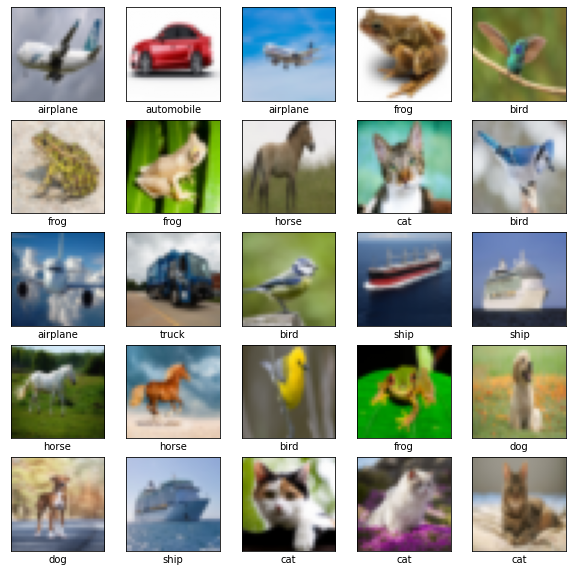

In [14]:
## Display few test images 
plt.figure(figsize=(10,10))
j=0
for i in y:
    plt.subplot(5,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_dataset['images'][i])
    plt.xlabel(label_names[image_dataset['target'][i]])
    j = j+ 1
plt.show()

In [15]:
## load pretrained model 
model_name = 'cifar10_classify.h5'
new_model = tf.keras.models.load_model(model_name)
print(new_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 12, 12, 64)       

In [16]:
test_images = image_dataset['images']
test_labels = image_dataset['target']

In [17]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

2/2 - 1s - loss: 0.7101 - accuracy: 0.8000
Restored model, accuracy: 80.00%


In [18]:
## get the probability 

probability_model = tf.keras.Sequential([new_model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)
## based on the max value of probability , predict the class.
test_predicted_labels = []
for i in range(len(predictions)):
    pred_label = np.argmax(predictions[i])
    test_predicted_labels.append(pred_label)
##

print("Classification report :\n{}\n".format(
     classification_report(test_labels, test_predicted_labels)))

Classification report :
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.83      1.00      0.91         5
           2       0.83      0.71      0.77         7
           3       0.60      0.60      0.60         5
           4       0.80      1.00      0.89         4
           5       0.50      0.50      0.50         6
           6       1.00      0.50      0.67         6
           7       1.00      1.00      1.00         5
           8       1.00      0.83      0.91         6
           9       1.00      1.00      1.00         6

    accuracy                           0.80        55
   macro avg       0.82      0.81      0.80        55
weighted avg       0.82      0.80      0.80        55




Class 9 and 7 i.e images of truck and horse have the all correct classifications.  
Class 3 , 5 and 6 i.e Bird , Deer and Dog images have very poor classification with a very low f1 score.    


In [19]:
image_dataset['target']

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9])

In [20]:
mask = image_dataset['target'] == np.array(test_predicted_labels)

In [21]:
image_dataset['target']

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9])

In [22]:
wrong_predictions = np.where(image_dataset['target'] != np.array(test_predicted_labels))[0].tolist()
wrong_predictions


[10, 14, 17, 19, 26, 28, 29, 35, 36, 37, 47]

In [23]:
for i in wrong_predictions:
    actual_label = label_names[image_dataset['target'][i]]
    predicted_label = label_names[test_predicted_labels[i]]
    print('Actual label : {} , predicted label : {} '.format(actual_label,predicted_label))

Actual label : bird , predicted label : airplane 
Actual label : bird , predicted label : airplane 
Actual label : cat , predicted label : dog 
Actual label : cat , predicted label : deer 
Actual label : dog , predicted label : bird 
Actual label : dog , predicted label : cat 
Actual label : dog , predicted label : cat 
Actual label : frog , predicted label : dog 
Actual label : frog , predicted label : dog 
Actual label : frog , predicted label : airplane 
Actual label : ship , predicted label : automobile 


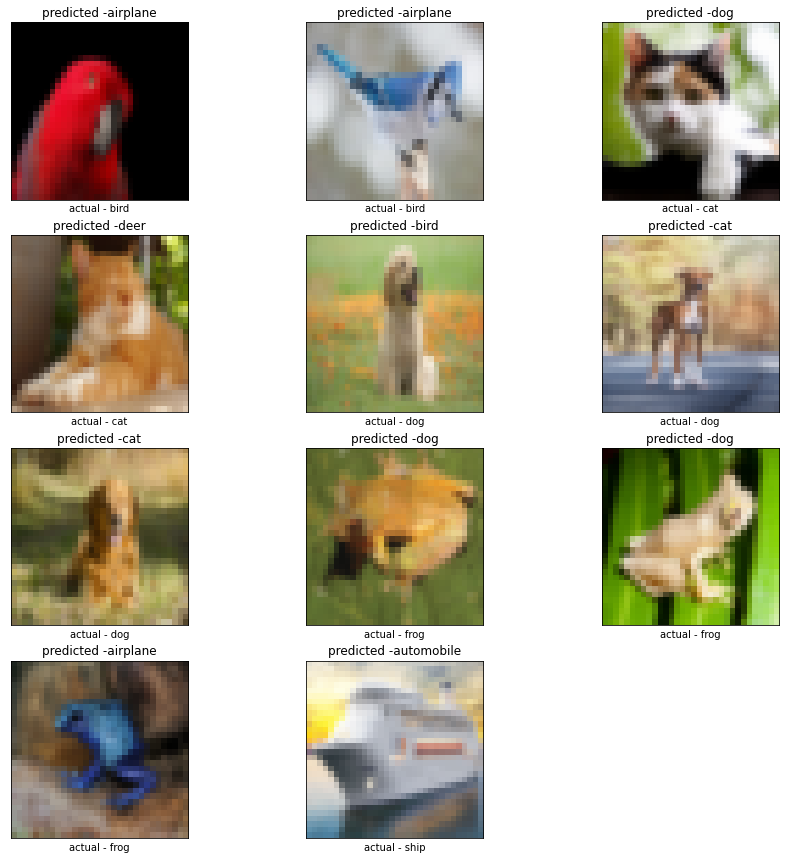

In [28]:
plt.figure(figsize=(15,15))
j=0
for i in wrong_predictions:
    plt.subplot(4,3,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_dataset['images'][i])
    plt.xlabel("actual - " + label_names[image_dataset['target'][i]])
    plt.title('predicted -'+ label_names[test_predicted_labels[i]])
    j = j+ 1
plt.show()